<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/pca/ejem-pres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas



In [28]:
x = [19,39,30,30,15,15,15,30]
y= [63,74,87,23,35,43,32,73]
x = x- np.mean(x)
y = y-np.mean(y)
datos = np.stack((x, y), axis=0)
datos

array([[ -5.125,  14.875,   5.875,   5.875,  -9.125,  -9.125,  -9.125,
          5.875],
       [  9.25 ,  20.25 ,  33.25 , -30.75 , -18.75 , -10.75 , -21.75 ,
         19.25 ]])

In [29]:
A=np.cov(datos)
A

array([[ 85.83928571, 121.32142857],
       [121.32142857, 551.07142857]])

In [30]:
autovalor, autovector = np.linalg.eig(A )
autovalor

array([ 56.10230167, 580.80841262])

In [33]:
autovector

array([[-0.97124992, -0.23806218],
       [ 0.23806218, -0.97124992]])

In [44]:
autovector[1]

array([ 0.23806218, -0.97124992])

In [47]:
proj = np.dot(autovector[1].T,datos)
proj

array([-10.20413038, -16.12663594, -30.89544444,  31.26455022,
        16.03861858,   8.26861925,  18.95236833, -17.29794561])

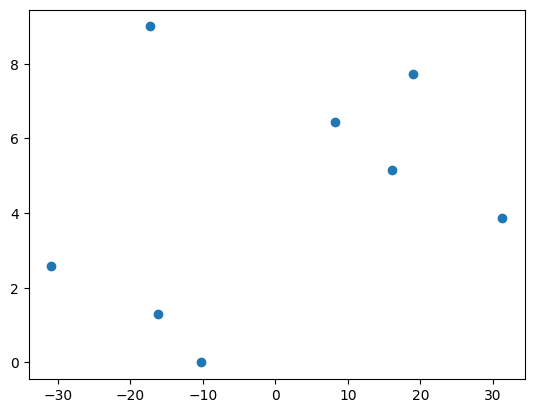

In [61]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(proj, np.linspace(0, 9, 8))

plt.show()

In [22]:
x1 = [19.,39.,30.,30.,15.,15.,15.,30.]
x2 =  [63.,74.,87.,23.,35.,43.,32.,73.]
N=np.size(x1)
X = np.column_stack([x1, x2])
X -= X.mean(axis=0)
fact = N-1
by_hand = np.dot(X.T, X.conj()) / fact
print(by_hand)

[[ 85.83928571 121.32142857]
 [121.32142857 551.07142857]]


In [23]:
autovalor, autovector = np.linalg.eig(by_hand )
autovalor

array([ 56.10230167, 580.80841262])

In [24]:
autovector

array([[-0.97124992, -0.23806218],
       [ 0.23806218, -0.97124992]])

In [ ]:
W

In [25]:
autovalor, autovector = np.linalg.eig(A)

In [26]:
autovalor

array([ 56.10230167, 580.80841262])

In [ ]:
autovector

array([[-0.97124992, -0.23806218],
       [ 0.23806218, -0.97124992]])

In [ ]:
x = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.2]
y= [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
datos = np.stack((x, y), axis=0)
datos

array([[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2. , 1. , 1.5, 1.2],
       [2.4, 0.7, 2.9, 2.2, 3. , 2.7, 1.6, 1.1, 1.6, 0.9]])

In [ ]:
b1 = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.2]
b2 =  [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
N=np.size(b1)
X = np.column_stack([b1, b2])
X -= X.mean(axis=0)
fact = N-1
by_hand = np.dot(X.T, X.conj()) / fact
print(by_hand)

[[0.60177778 0.60422222]
 [0.60422222 0.71655556]]


In [ ]:
Z = np.cov(x,y)
Z

array([[0.60177778, 0.60422222],
       [0.60422222, 0.71655556]])

In [ ]:
A=np.cov(datos)
A

array([[0.60177778, 0.60422222],
       [0.60422222, 0.71655556]])

In [ ]:
autovalor, autovector = np.linalg.eig(A)

In [ ]:
autovalor

array([0.04702256, 1.13951381])

In [ ]:
autovector

array([[-0.73977066, -0.67285911],
       [ 0.67285911, -0.73977066]])